In [1]:
#This code will perform automated download of all phages in specified in an excel file
#This code also will do some analysis of genes in phages
#This code heavily relies on DNA features viewer Zulkower and Rosser (2020), DNA Features Viewer: a sequence annotation formatting and plotting library for Python.
#Bioinformatics, Volume 36, Issue 15, 1 August 2020, Pages 4350–4352, https://doi.org/10.1093/bioinformatics/btaa213
#https://github.com/Edinburgh-Genome-Foundry/DnaFeaturesViewer

In [1]:
import os
import numpy as np
import pandas as pd
import random as rand
from scipy import stats
from tabulate import tabulate
from Bio import SeqIO
from dna_features_viewer import BiopythonTranslator, GraphicFeature, GraphicRecord
import matplotlib.pyplot as plt

%matplotlib inline

#fetches nucleotide record:
https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=nuccore&id=KF301602&rettype=fasta&retmode=text
#This can be done for multiple records as follows (will output in a single text file with genomes indicated by ">genomename":
https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=nuccore&id=KF301602,MT234343&rettype=fasta&retmode=text

#fetches genbank record:
https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=nuccore&id=KF301602&rettype=gb&retmode=text
#This can be done for multiple records as follows (will output in a single text file with gb entries separated by "//":
https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=nuccore&id=KF301602,MT234343&rettype=gb&retmode=text

In [2]:
#phage genbank accession #s:
phages = pd.read_excel('./uniprot-viruses(duf2312)_ret220408.xlsx')
Pnames = phages['Cross-reference (EMBL)'].values

In [18]:
#downloads all fasta files from NCBI in the list Pnames
for i in Pnames:
    x = i.split(';')[0]
    print(x)
    dlstring = "curl 'https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=nuccore&id={}&rettype=fasta&retmode=text' > ./{}.txt".format(x,x)
    os.system(dlstring)

LR797317


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 36784    0 36784    0     0  67668      0 --:--:-- --:--:-- --:--:-- 67742
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MT584811


100 40648    0 40648    0     0  66119      0 --:--:-- --:--:-- --:--:-- 66094
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MK892630


100 37102    0 37102    0     0  64968      0 --:--:-- --:--:-- --:--:-- 64977
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

LR796423


100  195k    0  195k    0     0   279k      0 --:--:-- --:--:-- --:--:--  279k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MK892531


100 42588    0 42588    0     0  70029      0 --:--:-- --:--:-- --:--:-- 69931
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MT234343


100  150k    0  150k    0     0   210k      0 --:--:-- --:--:-- --:--:--  210k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MT234342


100  149k    0  149k    0     0   205k      0 --:--:-- --:--:-- --:--:--  206k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MK892685


100 43970    0 43970    0     0  70743      0 --:--:-- --:--:-- --:--:-- 70691
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

CU468217


100 63299    0 63299    0     0   103k      0 --:--:-- --:--:-- --:--:--  103k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MK291442


100 50495    0 50495    0     0  81635      0 --:--:-- --:--:-- --:--:-- 81707
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MK892844


100 39175    0 39175    0     0  59035      0 --:--:-- --:--:-- --:--:-- 58998
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN988509


100  152k    0  152k    0     0   218k      0 --:--:-- --:--:-- --:--:--  218k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN988553


100  152k    0  152k    0     0   221k      0 --:--:-- --:--:-- --:--:--  221k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

HM151342


100 63623    0 63623    0     0   100k      0 --:--:-- --:--:-- --:--:--  100k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN988534


100  152k    0  152k    0     0   220k      0 --:--:-- --:--:-- --:--:--  220k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

KT266805


100 64480    0 64480    0     0  98207      0 --:--:-- --:--:-- --:--:-- 98292
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN988520


100  152k    0  152k    0     0   183k      0 --:--:-- --:--:-- --:--:--  183k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN988532


100  152k    0  152k    0     0   213k      0 --:--:-- --:--:-- --:--:--  213k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MK892652


100 40801    0 40801    0     0  64471      0 --:--:-- --:--:-- --:--:-- 64456
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MK929790


100 63304    0 63304    0     0   105k      0 --:--:-- --:--:-- --:--:--  105k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN855746


100  6168    0  6168    0     0  12904      0 --:--:-- --:--:-- --:--:-- 12903
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN855734


100 52445    0 52445    0     0  85291      0 --:--:-- --:--:-- --:--:-- 85415
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN855585


100 40724    0 40724    0     0  62011      0 --:--:-- --:--:-- --:--:-- 61984
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN855955


100 29826    0 29826    0     0  55548      0 --:--:-- --:--:-- --:--:-- 55541
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN988536


100 49433    0 49433    0     0  82613      0 --:--:-- --:--:-- --:--:-- 82663
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

LR798285


100 59559    0 59559    0     0  98409      0 --:--:-- --:--:-- --:--:-- 98282
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

LR796368


100 38043    0 38043    0     0  66861      0 --:--:-- --:--:-- --:--:-- 66977
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MT028491


100  225k    0  225k    0     0   262k      0 --:--:-- --:--:-- --:--:--  262k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

LR797114


100 35767    0 35767    0     0  65209      0 --:--:-- --:--:-- --:--:-- 65149
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN988519


100  169k    0  169k    0     0   243k      0 --:--:-- --:--:-- --:--:--  242k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

LR796674


100 57804    0 57804    0     0  94816      0 --:--:-- --:--:-- --:--:-- 94916
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

LR796459


100 56406    0 56406    0     0  91357      0 --:--:-- --:--:-- --:--:-- 91271
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MT778839


100  155k    0  155k    0     0   230k      0 --:--:-- --:--:-- --:--:--  230k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MT778837


100  154k    0  154k    0     0   228k      0 --:--:-- --:--:-- --:--:--  228k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

KM199770


100  155k    0  155k    0     0   225k      0 --:--:-- --:--:-- --:--:--  225k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

KY417925
MN549360


100 60694    0 60694    0     0  94588      0 --:--:-- --:--:-- --:--:-- 94538
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  157k    0  157k    0     0   228k      0 --:--:-- --:--:-- --:--:--  228k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MT188704


100  130k    0  130k    0     0   191k      0 --:--:-- --:--:-- --:--:--  191k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN549361


100  155k    0  155k    0     0   228k      0 --:--:-- --:--:-- --:--:--  228k


MN988486


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  151k    0  151k    0     0   222k      0 --:--:-- --:--:-- --:--:--  221k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

KF301602


100  154k    0  154k    0     0   230k      0 --:--:-- --:--:-- --:--:--  231k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MK892822


100 41356    0 41356    0     0  62874      0 --:--:-- --:--:-- --:--:-- 62851
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN180251


100 89052    0 89052    0     0   139k      0 --:--:-- --:--:-- --:--:--  138k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

LR798203


100 41211    0 41211    0     0  65126      0 --:--:-- --:--:-- --:--:-- 65207
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

KM233261


100 42754    0 42754    0     0  70285      0 --:--:-- --:--:-- --:--:-- 70203
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MT764845


100 65051    0 65051    0     0   101k      0 --:--:-- --:--:-- --:--:--  101k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

LR796432


100 59493    0 59493    0     0  90329      0 --:--:-- --:--:-- --:--:-- 90414
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MK892795


100 48539    0 48539    0     0  77310      0 --:--:-- --:--:-- --:--:-- 77291
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

LR798222


100 38855    0 38855    0     0  66730      0 --:--:-- --:--:-- --:--:-- 66761
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

KP881232


100  147k    0  147k    0     0   174k      0 --:--:-- --:--:-- --:--:--  174k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

LR796242


100 60759    0 60759    0     0  97674      0 --:--:-- --:--:-- --:--:-- 97526
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

HQ632855


100 61423    0 61423    0     0    98k      0 --:--:-- --:--:-- --:--:--   98k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

LR798191


100 44555    0 44555    0     0  76360      0 --:--:-- --:--:-- --:--:-- 76423
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

LR796344


100 61491    0 61491    0     0  94037      0 --:--:-- --:--:-- --:--:-- 94022
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

LR796869


100 36784    0 36784    0     0  67913      0 --:--:-- --:--:-- --:--:-- 67992
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

LR796727


100 59679    0 59679    0     0    98k      0 --:--:-- --:--:-- --:--:--   97k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MK892840


100 46366    0 46366    0     0  73247      0 --:--:-- --:--:-- --:--:-- 73248
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

KU382255


100  4624    0  4624    0     0   9359      0 --:--:-- --:--:-- --:--:--  9360
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

JF412297


100 49703    0 49703    0     0  75639      0 --:--:-- --:--:-- --:--:-- 75536
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MH015258


100 62316    0 62316    0     0  95207      0 --:--:-- --:--:-- --:--:-- 95138
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MH015249


100 60481    0 60481    0     0  92803      0 --:--:-- --:--:-- --:--:-- 92904
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MH015252


100 60013    0 60013    0     0  98450      0 --:--:-- --:--:-- --:--:-- 98381
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

KM581061


100 60506    0 60506    0     0  95789      0 --:--:-- --:--:-- --:--:-- 95737
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MH015254


100 60457    0 60457    0     0  92721      0 --:--:-- --:--:-- --:--:-- 92867
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

KY249644


100 61282    0 61282    0     0  57433      0 --:--:--  0:00:01 --:--:-- 57487
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

JQ312117


100 70439    0 70439    0     0  98590      0 --:--:-- --:--:-- --:--:-- 98516
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MT234341


100 69010    0 69010    0     0   105k      0 --:--:-- --:--:-- --:--:--  105k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MK637516


100 69486    0 69486    0     0   111k      0 --:--:-- --:--:-- --:--:--  111k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN988484


100 70136    0 70136    0     0   106k      0 --:--:-- --:--:-- --:--:--  106k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MH622937


100 54586    0 54586    0     0  90359      0 --:--:-- --:--:-- --:--:-- 90224
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN988495


100 68948    0 68948    0     0   106k      0 --:--:-- --:--:-- --:--:--  107k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN988557


100 70200    0 70200    0     0   110k      0 --:--:-- --:--:-- --:--:--  110k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN988470


100 68871    0 68871    0     0   101k      0 --:--:-- --:--:-- --:--:--  101k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN988544


100 70258    0 70258    0     0   109k      0 --:--:-- --:--:-- --:--:--  109k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN988531


100 70468    0 70468    0     0   111k      0 --:--:-- --:--:-- --:--:--  111k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN988546


100 70469    0 70469    0     0   113k      0 --:--:-- --:--:-- --:--:--  113k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN988537


100 68872    0 68872    0     0   106k      0 --:--:-- --:--:-- --:--:--  106k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

HQ632859


100 57829    0 57829    0     0  88049      0 --:--:-- --:--:-- --:--:-- 88019
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

LR797273


100 45413    0 45413    0     0  74513      0 --:--:-- --:--:-- --:--:-- 74447
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN746332


100 45953    0 45953    0     0  75167      0 --:--:-- --:--:-- --:--:-- 75209
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MK942064


100 45710    0 45710    0     0  75713      0 --:--:-- --:--:-- --:--:-- 75678
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MK291445


100 50939    0 50939    0     0  83768      0 --:--:-- --:--:-- --:--:-- 83781
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MK291443


100 38504    0 38504    0     0  67277      0 --:--:-- --:--:-- --:--:-- 67197
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MF403009


100 59868    0 59868    0     0  97685      0 --:--:-- --:--:-- --:--:-- 97663
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN862068


100 88537    0 88537    0     0   144k      0 --:--:-- --:--:-- --:--:--  144k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

AF448724


100 58301    0 58301    0     0  90986      0 --:--:-- --:--:-- --:--:-- 90953
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

LR796770


100 39500    0 39500    0     0  61389      0 --:--:-- --:--:-- --:--:-- 61335
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN988516


100 53141    0 53141    0     0  86100      0 --:--:-- --:--:-- --:--:-- 86128
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN988468


100 54433    0 54433    0     0  84511      0 --:--:-- --:--:-- --:--:-- 84392
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

KT820175


100 53970    0 53970    0     0  88475      0 --:--:-- --:--:-- --:--:-- 88475


In [20]:
#downloads all gb files from NCBI in the list Pnames
for i in Pnames:
    x = i.split(';')[0]
    print(x)
    dlstring = "curl 'https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=nuccore&id={}&rettype=gb&retmode=text' > ./gb/{}.gb.txt".format(x,x)
    os.system(dlstring)

LR797317


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 84429    0 84429    0     0  92274      0 --:--:-- --:--:-- --:--:-- 92272
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MT584811


100  103k    0  103k    0     0  96237      0 --:--:--  0:00:01 --:--:-- 96286
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MK892630


100 98531    0 98531    0     0  91549      0 --:--:--  0:00:01 --:--:-- 91571
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

LR796423


100  435k    0  435k    0     0   170k      0 --:--:--  0:00:02 --:--:--  170k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MK892531


100  107k    0  107k    0     0  84607      0 --:--:--  0:00:01 --:--:-- 84660
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MT234343


100  356k    0  356k    0     0   148k      0 --:--:--  0:00:02 --:--:--  148k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MT234342


100  352k    0  352k    0     0   131k      0 --:--:--  0:00:02 --:--:--  131k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MK892685


100  111k    0  111k    0     0  95835      0 --:--:--  0:00:01 --:--:-- 95921
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

CU468217


100  155k    0  155k    0     0   136k      0 --:--:--  0:00:01 --:--:--  136k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MK291442


100  112k    0  112k    0     0   109k      0 --:--:--  0:00:01 --:--:--  110k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MK892844


100  101k    0  101k    0     0  89141      0 --:--:--  0:00:01 --:--:-- 89163
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN988509


100  370k    0  370k    0     0   155k      0 --:--:--  0:00:02 --:--:--  155k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN988553


100  369k    0  369k    0     0   155k      0 --:--:--  0:00:02 --:--:--  155k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

HM151342


100  138k    0  138k    0     0   116k      0 --:--:--  0:00:01 --:--:--  117k


MN988534


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  366k    0  366k    0     0   150k      0 --:--:--  0:00:02 --:--:--  150k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

KT266805


100  134k    0  134k    0     0   122k      0 --:--:--  0:00:01 --:--:--  122k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN988520


100  370k    0  370k    0     0   171k      0 --:--:--  0:00:02 --:--:--  171k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN988532


100  369k    0  369k    0     0   115k      0 --:--:--  0:00:03 --:--:--  115k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MK892652


100  106k    0  106k    0     0  78832      0 --:--:--  0:00:01 --:--:-- 78878
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MK929790


100  141k    0  141k    0     0   110k      0 --:--:--  0:00:01 --:--:--  110k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN855746


100 14134    0 14134    0     0  21252      0 --:--:-- --:--:-- --:--:-- 21254
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN855734


100  102k    0  102k    0     0   103k      0 --:--:-- --:--:-- --:--:--  103k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN855585


100 82683    0 82683    0     0  79585      0 --:--:--  0:00:01 --:--:-- 79656
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN855955


100 63308    0 63308    0     0  73542      0 --:--:-- --:--:-- --:--:-- 73528
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN988536


100  112k    0  112k    0     0   104k      0 --:--:--  0:00:01 --:--:--  104k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

LR798285


100  130k    0  130k    0     0   109k      0 --:--:--  0:00:01 --:--:--  109k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

LR796368


100 88629    0 88629    0     0  63856      0 --:--:--  0:00:01 --:--:-- 63853
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MT028491


100  539k    0  539k    0     0   164k      0 --:--:--  0:00:03 --:--:--  164k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

LR797114


100 83190    0 83190    0     0  86312      0 --:--:-- --:--:-- --:--:-- 86296
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN988519


100  414k    0  414k    0     0   141k      0 --:--:--  0:00:02 --:--:--  141k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

LR796674


100  123k    0  123k    0     0   122k      0 --:--:--  0:00:01 --:--:--  122k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

LR796459


100  121k    0  121k    0     0   113k      0 --:--:--  0:00:01 --:--:--  113k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MT778839


100  357k    0  357k    0     0   150k      0 --:--:--  0:00:02 --:--:--  150k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MT778837


100  354k    0  354k    0     0   151k      0 --:--:--  0:00:02 --:--:--  151k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

KM199770


100  354k    0  354k    0     0   156k      0 --:--:--  0:00:02 --:--:--  156k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

KY417925


100  131k    0  131k    0     0   109k      0 --:--:--  0:00:01 --:--:--  109k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN549360


100  379k    0  379k    0     0   149k      0 --:--:--  0:00:02 --:--:--  149k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MT188704


100  310k    0  310k    0     0   132k      0 --:--:--  0:00:02 --:--:--  132k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN549361


100  369k    0  369k    0     0   151k      0 --:--:--  0:00:02 --:--:--  151k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN988486


100  366k    0  366k    0     0   161k      0 --:--:--  0:00:02 --:--:--  161k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

KF301602


100  332k    0  332k    0     0   121k      0 --:--:--  0:00:02 --:--:--  121k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MK892822


100  105k    0  105k    0     0  86734      0 --:--:--  0:00:01 --:--:-- 86780
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN180251


100  170k    0  170k    0     0   129k      0 --:--:--  0:00:01 --:--:--  128k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

LR798203


100 98688    0 98688    0     0  67402      0 --:--:--  0:00:01 --:--:-- 67409
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

KM233261


100 99607    0 99607    0     0  92716      0 --:--:--  0:00:01 --:--:-- 92743
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MT764845


100  147k    0  147k    0     0   119k      0 --:--:--  0:00:01 --:--:--  120k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

LR796432


100  128k    0  128k    0     0   110k      0 --:--:--  0:00:01 --:--:--  110k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MK892795


100  114k    0  114k    0     0  97541      0 --:--:--  0:00:01 --:--:-- 97589
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

LR798222


100 89593    0 89593    0     0  84269      0 --:--:--  0:00:01 --:--:-- 84283
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

KP881232


100  380k    0  380k    0     0   148k      0 --:--:--  0:00:02 --:--:--  148k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

LR796242


100  131k    0  131k    0     0   124k      0 --:--:--  0:00:01 --:--:--  124k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

HQ632855


100  132k    0  132k    0     0   115k      0 --:--:--  0:00:01 --:--:--  115k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

LR798191


100 98044    0 98044    0     0   101k      0 --:--:-- --:--:-- --:--:--  101k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

LR796344


100  137k    0  137k    0     0   109k      0 --:--:--  0:00:01 --:--:--  109k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

LR796869


100 83092    0 83092    0     0  90143      0 --:--:-- --:--:-- --:--:-- 90121
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

LR796727


100  128k    0  128k    0     0   112k      0 --:--:--  0:00:01 --:--:--  112k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MK892840


100  112k    0  112k    0     0   109k      0 --:--:--  0:00:01 --:--:--  109k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

KU382255


100 11038    0 11038    0     0  18415      0 --:--:-- --:--:-- --:--:-- 18396
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

JF412297


100  110k    0  110k    0     0  70744      0 --:--:--  0:00:01 --:--:-- 70773
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MH015258


100  133k    0  133k    0     0   126k      0 --:--:--  0:00:01 --:--:--  126k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MH015249


100  131k    0  131k    0     0   116k      0 --:--:--  0:00:01 --:--:--  117k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MH015252


100  129k    0  129k    0     0   113k      0 --:--:--  0:00:01 --:--:--  113k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

KM581061


100  130k    0  130k    0     0   110k      0 --:--:--  0:00:01 --:--:--  110k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MH015254


100  130k    0  130k    0     0   100k      0 --:--:--  0:00:01 --:--:--  101k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

KY249644


100  109k    0  109k    0     0   111k      0 --:--:-- --:--:-- --:--:--  111k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

JQ312117


100  175k    0  175k    0     0   125k      0 --:--:--  0:00:01 --:--:--  125k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MT234341


100  163k    0  163k    0     0  75957      0 --:--:--  0:00:02 --:--:-- 75986


MK637516


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  188k    0  188k    0     0   130k      0 --:--:--  0:00:01 --:--:--  130k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN988484


100  167k    0  167k    0     0   125k      0 --:--:--  0:00:01 --:--:--  125k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MH622937


100  113k    0  113k    0     0   101k      0 --:--:--  0:00:01 --:--:--  101k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN988495


100  166k    0  166k    0     0   116k      0 --:--:--  0:00:01 --:--:--  116k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN988557


100  167k    0  167k    0     0   111k      0 --:--:--  0:00:01 --:--:--  111k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN988470


100  165k    0  165k    0     0   123k      0 --:--:--  0:00:01 --:--:--  123k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN988544


100  167k    0  167k    0     0   109k      0 --:--:--  0:00:01 --:--:--  109k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN988531


100  168k    0  168k    0     0   126k      0 --:--:--  0:00:01 --:--:--  126k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN988546


100  167k    0  167k    0     0   121k      0 --:--:--  0:00:01 --:--:--  121k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN988537


100  165k    0  165k    0     0   123k      0 --:--:--  0:00:01 --:--:--  123k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

HQ632859


100  126k    0  126k    0     0   107k      0 --:--:--  0:00:01 --:--:--  107k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

LR797273


100   98k    0   98k    0     0   102k      0 --:--:-- --:--:-- --:--:--  102k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN746332


100   97k    0   97k    0     0  84983      0 --:--:--  0:00:01 --:--:-- 85020


MK942064


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 98487    0 98487    0     0    98k      0 --:--:-- --:--:-- --:--:--   98k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MK291445


100  112k    0  112k    0     0   105k      0 --:--:--  0:00:01 --:--:--  105k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MK291443


100 85539    0 85539    0     0  92017      0 --:--:-- --:--:-- --:--:-- 91977
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MF403009


100  117k    0  117k    0     0   100k      0 --:--:--  0:00:01 --:--:--  100k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN862068


100  189k    0  189k    0     0   123k      0 --:--:--  0:00:01 --:--:--  123k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

AF448724


100  141k    0  141k    0     0   115k      0 --:--:--  0:00:01 --:--:--  115k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

LR796770


100 91921    0 91921    0     0  81841      0 --:--:--  0:00:01 --:--:-- 81780
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

MN988516


100  123k    0  123k    0     0   109k      0 --:--:--  0:00:01 --:--:--  109k
  % T

MN988468


otal    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  128k    0  128k    0     0   106k      0 --:--:--  0:00:01 --:--:--  106k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

KT820175


100  104k    0  104k    0     0   108k      0 --:--:-- --:--:-- --:--:--  108k


In [3]:
#I'm going to create a columns for GapR position and reindex everything by the reference I used
loc = []
reindex = []

for j in range(0,len(phages)):
    record = SeqIO.read('./gb/{}.gb.txt'.format(phages.iloc[j]['Cross-reference (EMBL)'].split(';')[0]), "genbank")
#    print("ID %s" % record.id)
    reindex.append(phages.iloc[j]['Cross-reference (EMBL)'].split(';')[0])
    for i in record.features:
        if i.type == 'CDS':
            if i.qualifiers['protein_id'] == [phages.iloc[j]['EMBL Nt'].split(';')[0]]:
#                print('FOUND GAPR')
                loc.append([record.id.split('.')[0],i.location])

In [4]:
#merge it all together
locdf = pd.DataFrame(loc)
locdf.columns = ['Cross-reference (EMBL)','location']
locdf.index = locdf['Cross-reference (EMBL)'].values
phages2 = phages.copy()
phages2.index = reindex
phages2 = phages2.join(locdf,lsuffix='_l',rsuffix='_r')

In [5]:
#merged matrix
phages2

,Entry,Entry name,Protein names,Gene names,Organism,Length,Features,Cross-reference (RefSeq),Cross-reference (Pfam),Cross-reference (KEGG),Cross-reference (EMBL)_l,EMBL Nt,kegg gene name,Cross-reference (EMBL)_r,location
LR797317,A0A6J5S006,A0A6J5S006_9CAUD,"Azospirillum phage Cd, Gp10",UFOVP1368_54,uncultured Caudovirales phage,75,Non-terminal residue (1),NaN,PF10073;,NaN,LR797317;,CAB4202975.1,NaN,LR797317,"(36206, 36205, 36204, 36203, 36202, 36201, 362..."
MT584811,A0A7D9N096,A0A7D9N096_9CAUD,Putative transcription factor,phiGT1_39,Sulfitobacter phage phiGT1,76,Coiled coil (1),NaN,PF10073;,NaN,MT584811;,QLB38251.1,NaN,MT584811,"(28383, 28382, 28381, 28380, 28379, 28378, 283..."
MK892630,A0A516LJS8,A0A516LJS8_9VIRU,Putative double-stranded DNA-binding protein,GOVbin4685_59,Prokaryotic dsDNA virus sp.,78,NaN,NaN,PF10073;,NaN,MK892630;,QDP54199.1,NaN,MK892630,"(27630, 27631, 27632, 27633, 27634, 27635, 276..."
LR796423,A0A6J5MAT8,A0A6J5MAT8_9CAUD,"Azospirillum phage Cd, Gp10",UFOVP447_119,uncultured Caudovirales phage,79,Coiled coil (1),NaN,PF10073;,NaN,LR796423;,CAB4143322.1,NaN,LR796423,"(116423, 116422, 116421, 116420, 116419, 11641..."
MK892531,A0A516LGW7,A0A516LGW7_9VIRU,Putative double-stranded DNA-binding protein,Tp118SUR00d2C21406231_37 Tp125DCM00d2C40298531_56,Prokaryotic dsDNA virus sp.,80,Coiled coil (1),NaN,PF10073;,NaN,MK892531;MK892614;,QDP48421.1; QDP53157.1,NaN,MK892531,"(32326, 32325, 32324, 32323, 32322, 32321, 323..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AF448724,Q8W6H2,Q8W6H2_9CAUD,Uncharacterized protein orf55,orf55,Sinorhizobium phage PBC5,133,Coiled coil (1); Region (1),NP_542315.1;,PF10073;,NaN,AF448724;,AAL49609.1,NaN,AF448724,"(44442, 44441, 44440, 44439, 44438, 44437, 444..."
LR796770,A0A6J5NZE3,A0A6J5NZE3_9CAUD,"Azospirillum phage Cd, Gp10",UFOVP1603_4 UFOVP833_21,uncultured Caudovirales phage,200,Region (1),NaN,PF10073;,NaN,LR796770;LR797475;,CAB4165050.1; CAB4218052.1,NaN,LR796770,"(13269, 13268, 13267, 13266, 13265, 13264, 132..."
MN988516,A0A7S5UV87,A0A7S5UV87_9CAUD,Uncharacterized protein,EVB88_065,Rhizobium phage RHph_N28_2,305,Coiled coil (1); Compositional bias (1); Regio...,NaN,PF10073;,NaN,MN988516;,QIG70449.1,NaN,MN988516,"(44698, 44699, 44700, 44701, 44702, 44703, 447..."
MN988468,A0A7S5QW09,A0A7S5QW09_9CAUD,DUF2312 domain-containing protein,EVB37_071,Rhizobium phage RHph_TM3_3_3,313,Region (2),NaN,PF10073;,NaN,MN988468;,QIG67307.1,NaN,MN988468,"(44138, 44139, 44140, 44141, 44142, 44143, 441..."


In [6]:
#checks which phages are complete
complete = 0
for j in range(len(phages2)):
    phage = phages2.index[j]
    record = SeqIO.read('./gb/{}.gb.txt'.format(phage), "genbank")
    if len(record.description.split('complete')) > 1:
#        print("ID %s" % record.id, ' GapR=',phages2.loc[phage]['EMBL Nt'], len(record.seq))
        complete += 1
    else:
        pass
#        print(record.description)

<Figure size 216x360 with 0 Axes>

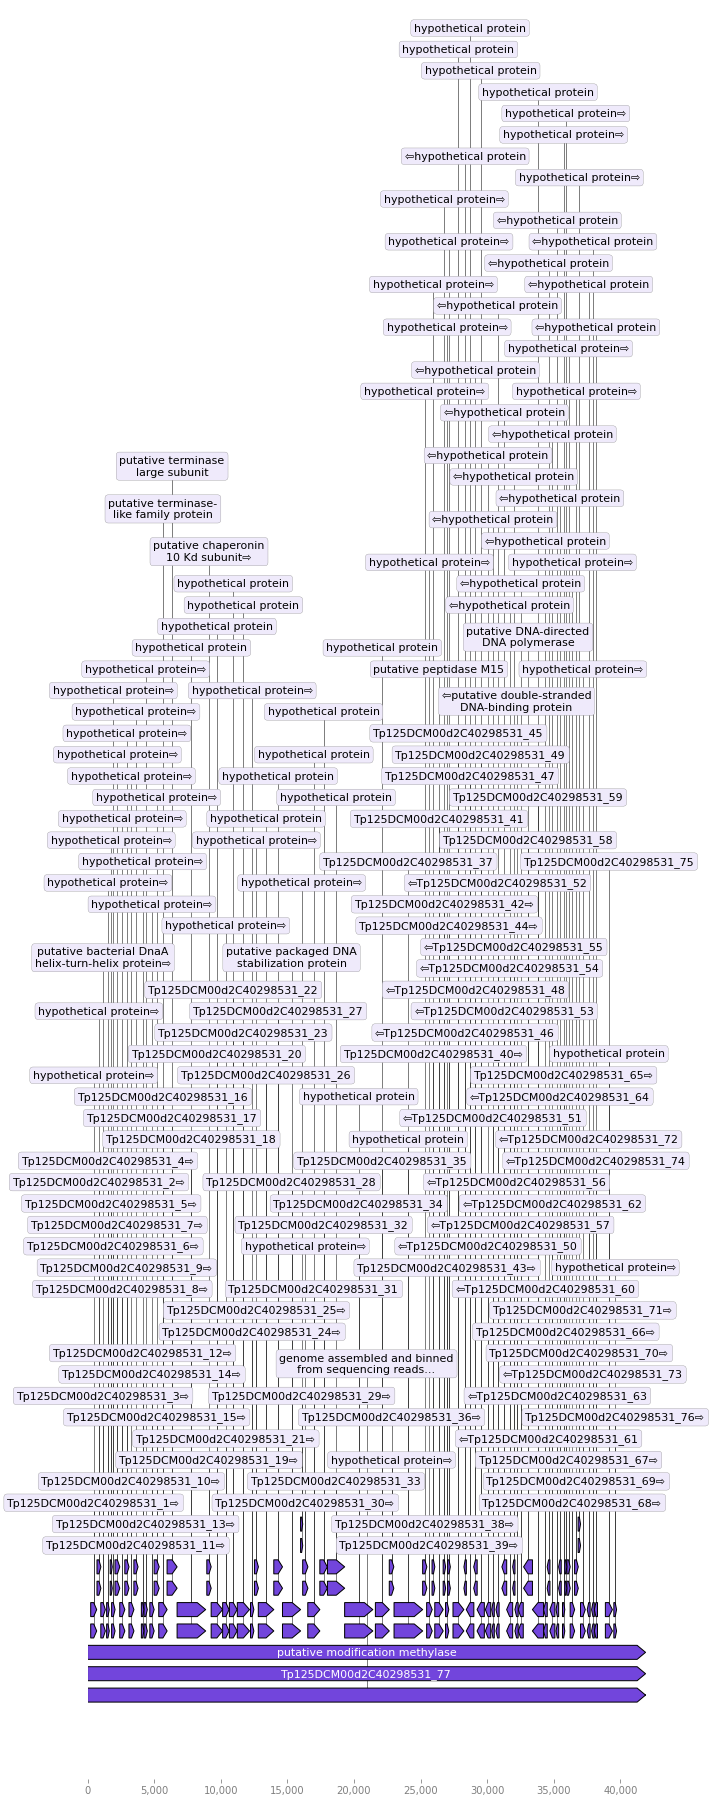

In [29]:
#example plot 1) display whole genbank file
phage = phages2.index[4]
record = SeqIO.read('./gb/{}.gb.txt'.format(phage), "genbank")
if len(record.description.split('complete')) > 1:
    graphic_record = BiopythonTranslator().translate_record("./gb/{}.gb.txt".format(phage))
    plt.figure(figsize = [3,5])
    ax, _ = graphic_record.plot(figure_width=10, strand_in_label_threshold=7)

<Figure size 216x360 with 0 Axes>

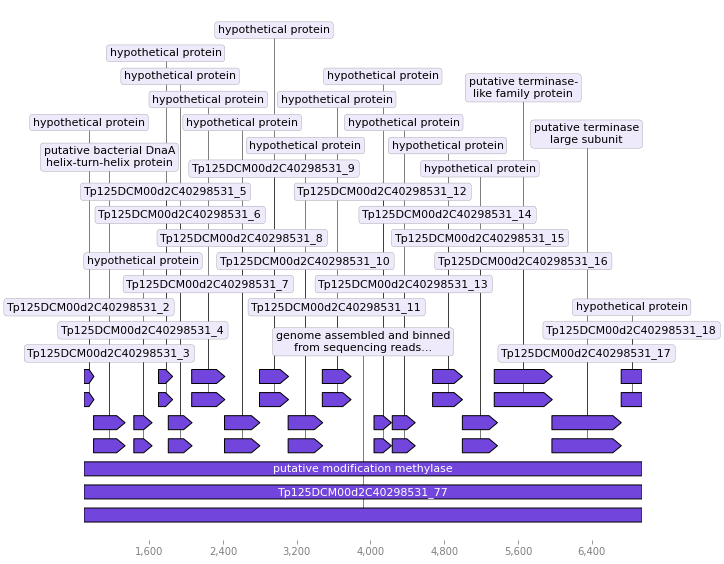

In [28]:
#example plot 2) make cropped view, centered around GapR
phage = phages2.index[4]
record = SeqIO.read('./gb/{}.gb.txt'.format(phage), "genbank")
if len(record.description.split('complete')) > 1:
    graphic_record = BiopythonTranslator().translate_record("./gb/{}.gb.txt".format(phage))
    try:
        cropped_record = graphic_record.crop((int(phages2.location[j].start)-2500, int(phages2.location[j].end)+2500))
    except:
        cropped_record = graphic_record.crop((int(phages2.location[j].start), int(phages2.location[j].end)))
    plt.figure(figsize = [3,5])
    ax, _ = cropped_record.plot(figure_width=10, strand_in_label_threshold=7)


<Figure size 216x360 with 0 Axes>

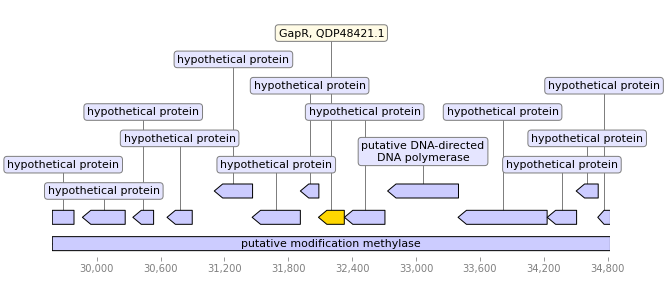

In [27]:
#example plot 3) improve visual aesthetics
phage = phages2.index[4]
features = []
record = SeqIO.read('./gb/{}.gb.txt'.format(phage), "genbank")
if len(record.description.split('complete')) > 1:
    for i in record.features:
        if i.type == 'CDS':
            if i.qualifiers['protein_id'] == [phages2.loc[phage]['EMBL Nt'].split(';')[0]]:
                features.append(GraphicFeature(start=int(i.location.start), end=int(i.location.end), strand=i.location.strand, color='#ffd700',label='GapR, '+i.qualifiers['protein_id'][0]))
            else:
                features.append(GraphicFeature(start=int(i.location.start), end=int(i.location.end), strand=i.location.strand, color='#ccccff',label=i.qualifiers['product'][0]))
    grecord = GraphicRecord(sequence_length=len(record.seq), features=features)
    try:
        cropped_record = grecord.crop((int(phages2.loc[phage].location.start)-2500, int(phages2.loc[phage].location.end)+2500))
        plt.figure(figsize = [3,5])
        ax, _ = cropped_record.plot(figure_width=10, strand_in_label_threshold=7)
    except:
        pass


In [23]:
from bokeh.resources import CDN
from bokeh.embed import file_html

#example plot 4) make interactable with bokeh!
phage = phages2.index[4]
features = []
record = SeqIO.read('./gb/{}.gb.txt'.format(phage), "genbank")
if len(record.description.split('complete')) > 1:
    for i in record.features:
        if i.type == 'CDS':
            if i.qualifiers['protein_id'] == [phages2.loc[phage]['EMBL Nt'].split(';')[0]]:
                features.append(GraphicFeature(start=int(i.location.start), end=int(i.location.end), strand=i.location.strand, color='#ffd700',label='GapR, '+i.qualifiers['protein_id'][0]))
            else:
                features.append(GraphicFeature(start=int(i.location.start), end=int(i.location.end), strand=i.location.strand, color='#ccccff',label=i.qualifiers['product'][0]))
    grecord = GraphicRecord(sequence_length=len(record.seq), features=features)
    cropped_record = grecord.crop((int(phages2.loc[phage].location.start)-2500, int(phages2.loc[phage].location.end)+2500))
    plot = cropped_record.plot_with_bokeh(figure_width=10)

    with open("plot_with_bokeh.html", "w+") as f:
        f.write(file_html(plot, CDN, "Example Sequence"))


<Figure size 216x360 with 0 Axes>

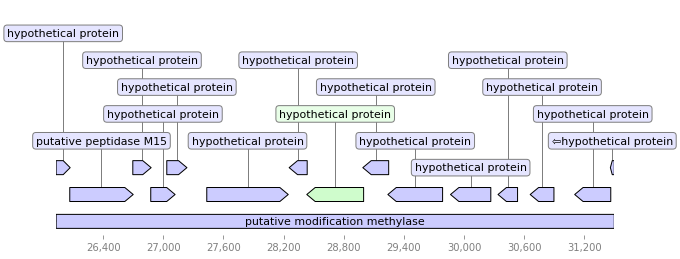

In [41]:
#example plot 5) random gene
%matplotlib inline

phage = phages2.index[4]
features = []
record = SeqIO.read('./gb/{}.gb.txt'.format(phage), "genbank")
if len(record.description.split('complete')) > 1:
    for i in record.features:
        if i.type == 'CDS':
            features.append(GraphicFeature(start=int(i.location.start), end=int(i.location.end), strand=i.location.strand, color='#ccccff',label=i.qualifiers['product'][0]))
            
    features_copy = features.copy()
    r = rand.randint(0,len(features)-1)
    rold = features[r]
    features_copy[r] = GraphicFeature(start=rold.start, end=rold.end, strand=rold.strand, color='#cffccc',label=rold.label)
    grecord = GraphicRecord(sequence_length=len(record.seq), features=features_copy)
    try:
        cropped_record = grecord.crop((features_copy[r].start-2500, features_copy[r].end+2500))
        plt.figure(figsize = [3,5])
        ax, _ = cropped_record.plot(figure_width=10, strand_in_label_threshold=7)
    except:
        pass


In [78]:
#generates a plot of GapR gene organization for all complete phage genomes with GapR in the middle (not too close to end)
#counts how many GapRs are next to rep proteins vs phage tail/portal/head proteins
%matplotlib auto
GapR_rep = []
GapR_pack = []
for j in range(len(phages2)):
    phage = phages2.index[j]
    features = []
    record = SeqIO.read('./gb/{}.gb.txt'.format(phage), "genbank")
    if len(record.description.split('complete')) <= 1:
        pass
    else:
        for i in record.features:
            if i.type == 'CDS':
                if i.qualifiers['protein_id'] == [phages.iloc[j]['EMBL Nt'].split(';')[0]]:
                    features.append(GraphicFeature(start=int(i.location.start), end=int(i.location.end), strand=i.location.strand, color='#ffd700',label='GapR, '+i.qualifiers['protein_id'][0]))
                else:
                    features.append(GraphicFeature(start=int(i.location.start), end=int(i.location.end), strand=i.location.strand, color='#ccccff',label=i.qualifiers['product'][0]))
        grecord = GraphicRecord(sequence_length=len(record.seq), features=features)
        try:
            cropped_record = grecord.crop((int(phages2.location[j].start)-2500, int(phages2.location[j].end)+2500))
            #makes plots if needed
            #plt.figure(figsize = [3,5])
            #ax, _ = cropped_record.plot(figure_width=10, strand_in_label_threshold=7)
            #plt.savefig('./figs/{}_GapRloc.pdf'.format(phage))
            
            for x in cropped_record.features:
                if (len(x.label.split('pol')) > 1) or (len(x.label.split('single-stranded DNA-binding')) > 1) or (len(x.label.split('helicase')) > 1):
                    GapR_rep.append(phage+' , rep')
            for x in cropped_record.features:
                if (len(x.label.split('tail')) > 1) or (len(x.label.split('portal')) > 1) or (len(x.label.split('head')) > 1):
                    #print(x.label)
                    GapR_pack.append(phage+' , packaging')
        except:
            pass
        
%matplotlib inline

In [103]:
#repeats above with randomly chosen genes -- does 10 random genes per phage
%matplotlib auto
rand_rep = []
rand_pack = []
counter = 0
for j in range(len(phages2)):
    phage = phages2.index[j]
    features = []
    record = SeqIO.read('./gb/{}.gb.txt'.format(phage), "genbank")
    if len(record.description.split('complete')) <= 1:
        pass
    else:        
        for i in record.features:
            if i.type == 'CDS':
                features.append(GraphicFeature(start=int(i.location.start), end=int(i.location.end), strand=i.location.strand, color='#ccccff',label=i.qualifiers['product'][0]))

        l = 0
        while l < 20:
            features_copy = features.copy()
            r = rand.randint(0,len(features)-1)
            rold = features[r]
            features_copy[r] = GraphicFeature(start=rold.start, end=rold.end, strand=rold.strand, color='#cffccc',label=rold.label)
            grecord = GraphicRecord(sequence_length=len(record.seq), features=features_copy)
            try:
                cropped_record = grecord.crop((features_copy[r].start-2500, features_copy[r].end+2500))
                for x in cropped_record.features:
                    if (len(x.label.split('pol')) > 1) or (len(x.label.split('single-stranded DNA-binding')) > 1) or (len(x.label.split('helicase')) > 1) or (len(x.label.split('DnaA')) > 1):
                        rand_rep.append(1)                
                for x in cropped_record.features:
                    if (len(x.label.split('tail')) > 1) or (len(x.label.split('portal')) > 1) or (len(x.label.split('head')) > 1):
                        #print(x.label)
                        rand_pack.append(1)
                l +=1
            except:
                pass
            
        counter += l 
        #makes plots if needed
#        plt.figure(figsize = [3,5])
#        ax, _ = cropped_record.plot(figure_width=10, strand_in_label_threshold=7)
#        plt.savefig('./figs/{}_GapRloc.pdf'.format(phage))

%matplotlib inline

In [116]:
print(sum(rand_rep), sum(rand_pack), counter)
print(len(GapR_rep), len(GapR_pack), complete)

340 650 1360
27 2 68


In [115]:
data = [['category','next to replication protein','next to structural protein','total'],['GapR',27,2,68],['random',340,650,1360]]
print(tabulate(data))

--------  ---------------------------  --------------------------  -----
category  next to replication protein  next to structural protein  total
GapR      27                           2                           68
random    340                          650                         1360
--------  ---------------------------  --------------------------  -----


In [107]:
#generate fisher's exact test:
print("fisher's exact test for random vs GapR " + str(stats.fisher_exact([[27,2],[340,650]])[1]))

fisher's exact test for random vs GapR 1.02426024526399e-10


In [46]:
340/1360, 650/1360, (1360-650-340)/1360

(0.25, 0.47794117647058826, 0.27205882352941174)

In [47]:
27/68, 2/68, (68-2-27)/68

(0.39705882352941174, 0.029411764705882353, 0.5735294117647058)

In [44]:
2/68

0.029411764705882353